# **COMPUTING ARTIFACT**

github : https://github.com/eviofekeze/ComputingArtifact.git


# **Computing Artifact**

In the field of environmental sciences, data is crucial to understanding the constantly changing state of the world around us. One main challenge in acquiring data is the variability in measurements over specific distance (known as spatial variability). This motivates the question; ***How do points vary, as a function of their lag(distance)?'***. In many cases, points closer to each other are similar. However this is not always the case. Other factors can influence the variability in measurements such that close point still differ. This computing artifact shows the python implementation of common functions used in quantifying spatial variability in environmental sciences.

## **Goals of Geo-statistics**

The following are a summary of the three main goals of geo-statistics:

1. To quantify spatial variability: This is primarily done using the experimental variogram (also called semi variogram). The experimental variogram is an estimation of the squared difference between two points at different spacings (lag distances). The data derived from the computation of the experimental variogram can be used to fit a model to get parameters for defining a length scale.

2. Quantify length scales of spatial variation: This can be achieved by modeling an experimental variogram. The goal of the model is to minimize the uncertainty in length scale of the spatial variation in a given dataset.    

3.  Predict data at unsampled locations: This can be achieved using a spatial interpolation method like krigging. Krigging is used to estimate values at unsampled location by creating a model that minimizes errors when predicted and sampled data are compared. An important attribute of krigging is the fact that its output includes estimates of uncertainties in the predicted data.


## **Basic Definitions**

1. Scale Triplet: This is used to compare different sampling strategies.
2.  Spacing/Lag: This is the distance between observed points.
3. Support: This is the area over which the measurements are averaged. For example, the support of a satellite image, is its pixel, while the support of radar, is the size of its footprint. 
4.  Extent: This is the largest separation between any two pair of value in a variogram model. Ideally,  computation is not performed for points larger than half of the extent when quantifying spatial variability.
5. Head: This is the first point in a pair of measurements used in computing the variogram.
6. Tail: This is the second point in a pair of measurements used in computing the variogram.


    
### **Work flow**  

Consider the flow chart below

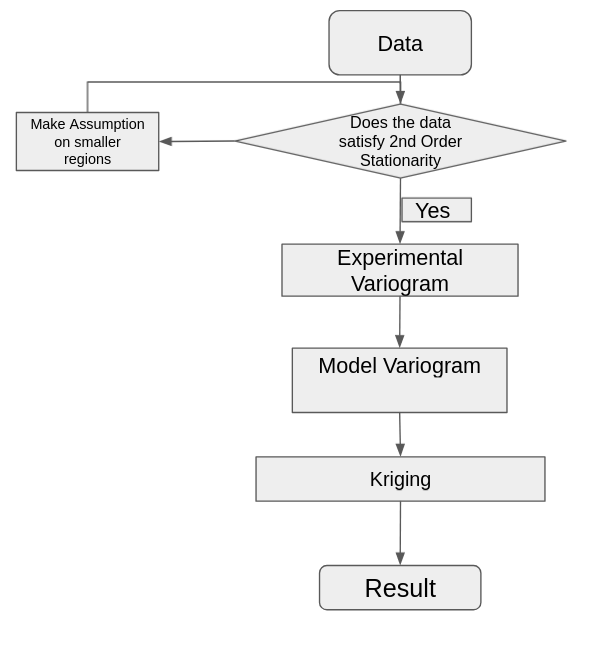

In [1]:
from IPython.display import Image
Image(filename = "Flow.png", width=400, height=400)

Figure 1 shows the work flow of quantifying spatial variability to estimating measurements of unsampled locations. This process entails data acquisition, quantifying the spatial variability, then modeling the variogram, and finally predicting data at un-sampled locations. It is pertinent to note that a dataset must satisfy the ***assumption of stationarity*** for use with an experimental variogram.

**ASSUMPTION OF STATIONARITY (2nd Order or Weak Stationary)**


The assumption of stationarity also referred to as weak stationary or $2^{nd}$ order stationary is the assumption that the mean, variance and correlation of the data set is approximately constant. Consider a dataset $z^n = x_1, x_2, \cdots, x_n$, The assumption of stationarity assumes the following:

1. The mean is constant, the mean for any given partition of the data can be within $\pm20\%$ of each other.
$$\mu = E[z(x)]$$
$$\mu(x_1) \approx \mu(x_2)$$
2. Variance is stationary.
$$\sigma^2 \approx E[(z(x)-\mu)^2]$$
3. Assume correlation is constant for any $h = x_i - x_j$
$$C(x_i,x_j) \approx E[(z(x_i)-\mu)(z(x_j)-\mu)]$$

Alternatively,
\begin{align}
    C(z(x),z(x+h)) &= E[(z(x)-\mu)(z(x+h)-\mu)]\\
    & = C(h)
\end{align}

where $\mu$ = mean , $\sigma^2 $= variance, $h =$ change in x

If these assumptions do not hold for a given dataset, the data is divided into smaller regions, and is tested for stationarity. Once stationarity is achieved, a variogram ca be can modeled for the dataset. at this point, it will be useful to consider, the theoretical variogram.

### **Theoretical variogram model**
Theoretically, there is small variation between measurements in close proximity. However as the distance among these measurements increase, the variance  increases. To visualize this, consider a plot of variability in measurements versus the lag at which these measurements were taken. 

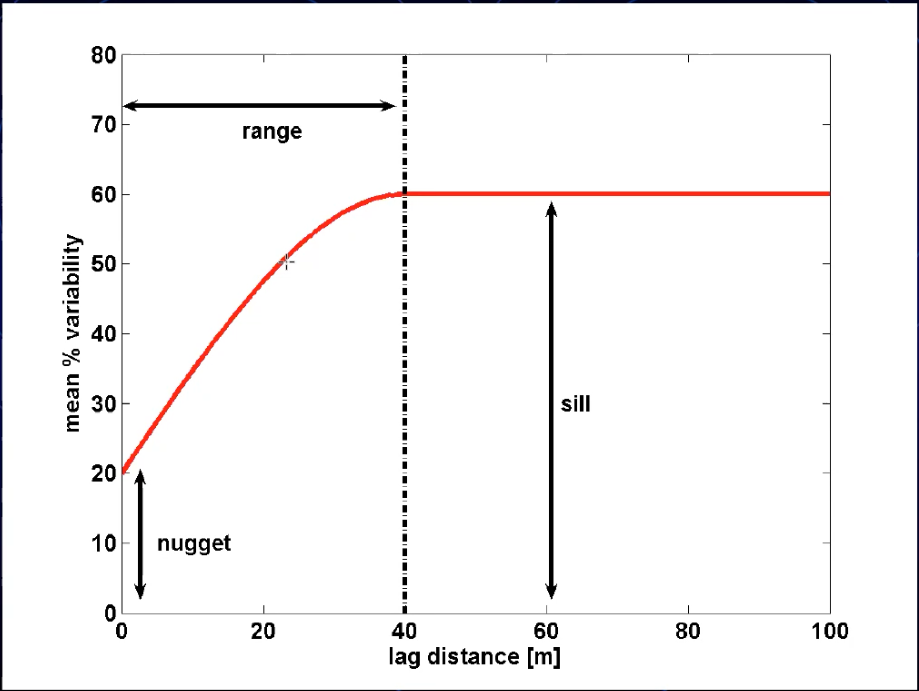

In [2]:
from IPython.display import Image
Image(filename = "variogram.png", width=400, height=400)

From Figure 2, the variance in the measurements increase as the lag increases. The red line indicates the variation in data at different lag distances. At some point, the variance becomes constant. The major components of the variogram are defined as follows:

- **Sill :** This is the variance  of the dataset. From figure 2 above, it is the point where the variation in the data becomes constant.
- **Nugget :** This is the y axis intercept which represents the variation in scale that is smaller than the resolution of the measurements.
- **Range :** This represents the distance between measurements, where the mean variation between any two point is same as the variation in the data.

### **Generalize variogram model**
Conceptually, we have the semi variogram as the sum of averages of the difference between two preceding points separated by a given lag distance. Since the summation considers the difference between two pairs of point, the result is divided by two. The name semi variogram comes from this half in the equation. Mathematically this is given by,


\begin{align*}
    \gamma(h) &= \frac{1}{2N} \sum^{N}_{i=1}\big(z(x_i) - z(x_i + h)\big)^2\\
\end{align*}

where $u_i = $ head of the pair, $v_i = $ tail of the pair, $m = $ number of pairs, $N = $ number of points, $F = $ percentage variation

**Note:** Accurate estimates require $n\geq 150$

**Inteperation of results:** if $F= f$, it implies that measurements in the dataset vary by $\pm f\%$

Generally, the equation above is written as:
\begin{align*}
\gamma(h) &= \frac{1}{2N} \sum^{N}_{i=1}\big(z(x_i) - z(x_i + h)\big)^2 \text[ n \geq 150]\\
\end{align*}

### **Modelling the Variogram**
This is done by choosing the best values for range and sill that minimizes the error in measurements. It is similar to fitting a least square line in regression analysis.

### **Kriging**
Kriging is a method of interpolation based on gaussian process governed by prior covariances for estimating measurements for unsampled locations, under suitable assumptions of the prior covariances. This method provides the best linear unbiased prediction (BLUP) at unsampled locations.

## **Implementation**

### **Experimental Variogram**
The experimental variogram will be implemented on a small data set  of snow accumulation rate from devon ice cap. The first column is the distance along a transect near the ice cap summit in meters, and the second column is the accumulation rate in water equivalent in centimeters. Snow accumulation represent the amount of snow stored during early winter season. Below are the some helper functions used in this documents.

In [3]:
#Importing basics libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#importing fuctions
import spatialVaribility as sv
from spatialVaribility import semivariogram
# from spatialVaribility import model_variogram, model_variogram_error, semivariogram
from spatialVaribility import plot_variogram, plot_covariance, plot_autocorr

%matplotlib inline

**Loading  Data**

In [4]:
#loading the data
devonbdot = pd.read_csv('DevonBdot.csv', header = None)
devonbdot.columns = ['dist','acc'] # assign column names
dist,acc = np.array(devonbdot['dist']), np.array(devonbdot['acc'])
devonbdot.head() # display first five columsns of data

,dist,acc
0,0,26.355103
1,2,24.566650
2,4,26.040649
3,6,25.549316
4,8,24.205376


Next, a test is performed to check for stationarity, this is done by partitioning data into four equal section, and computing the mean and variance for the different partitions.

In [5]:
sec_1 = acc[0:100] # 1st section of accumulation rates
sec_2 = acc[100:200] # 2nd section of accumulation rates
sec_3 = acc[200:300] # 3rd section of accumulation rates
sec_4 = acc[300:400] # 4th section of accumulation rates

pd.DataFrame({'Mean': [np.mean(sec_1),np.mean(sec_2),np.mean(sec_3),np.mean(sec_4)],
              'Variance': [np.var(sec_1),np.var(sec_2),np.var(sec_3),np.var(sec_4)]})

,Mean,Variance
0,18.851112,38.954942
1,18.601579,21.398444
2,15.117402,62.535571
3,19.262674,41.439434


In [6]:
# def partitioner(data, partition):
#     import math
#     num_in_part = math.floor(len(data)/partition)
#     sec_names = ['sec' + str(i) for i in range(partition)]
#     for i in range(partition):
#         temp = data[i*num_in_part:(i+1)*num_in_part]
    # return

From the above, the data is seen to pass the conditions of stationarity. Therefore, a semivariogramcan be modeled, for this data. The required functions to compute the semi variogram are in the appendix. These functions will only be implemented here.

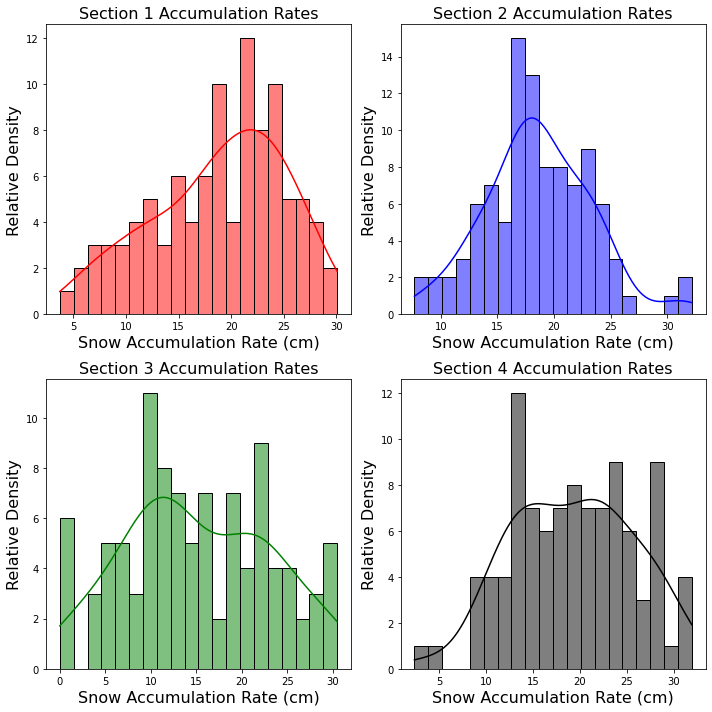

In [7]:
fig, axes = plt.subplots(2, 2, figsize = (10, 10)) # initialize axes

ax1 = axes[0][0]
ax2 = axes[0][1]
ax3 = axes[1][0]
ax4 = axes[1][1]

ys = [sec_1,sec_2,sec_3,sec_4]
ax = [ax1,ax2,ax3,ax4]
color_ = ['red','blue','green','black']

for i in range(4):
    sns.histplot(ys[i], kde=True,
                 bins = 20,
                 color= color_[i],
                 ax = ax[i]) 

    ax[i].set_title('Section ' + str(i+1) + ' Accumulation Rates', fontsize = 16) # set title
    ax[i].set_ylabel('Relative Density',fontsize = 16) # set y-axis label
    ax[i].set_xlabel('Snow Accumulation Rate (cm)',fontsize = 16) # set x-axis label

plt.tight_layout()
plt.savefig('stationCheck.png')

From the above, the data is seen to pass the conditions of stationarity. Therefore, a semivariogramcan be modeled, for this data. The required functions to compute the semi variogram are in the appendix. These functions will only be implemented here.


In [8]:
#Create an instance of the class
semi_var = sv.semivariogram() 
# use the solve method 
semi_var.solve(dist,acc) 

**Visualization**

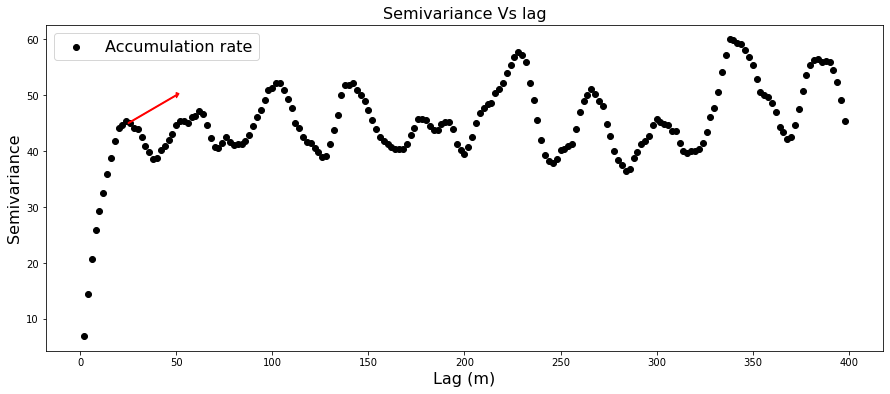

In [9]:
plot_variogram(dist,acc, figsize = (15,6), label = 'Accumulation rate')
plt.legend(fontsize = 16)
plt.arrow(25, 45, 25, 5, color ='r', width = 0.2, head_width = 1)
plt.savefig('sv.png')

Figure 4 above looks similar to the theoretical variogram model in Figure 2. Here we see an increase in variation of accumulation rates as the lag distance increases. This variation begins to flatten out at the sill indicated by the red arrow. In the theoretical model, the variance completely flattens from the range, However, this is not exactly the case here. Is it important to note here, that variability in measurements is not only a function of distance. Other factors like elevation and slope angle can also contribute to variation. In some cases measurement from the same elevation separated by a huge lag may be more similar than measurements separated by a very small distance but having different elevation.

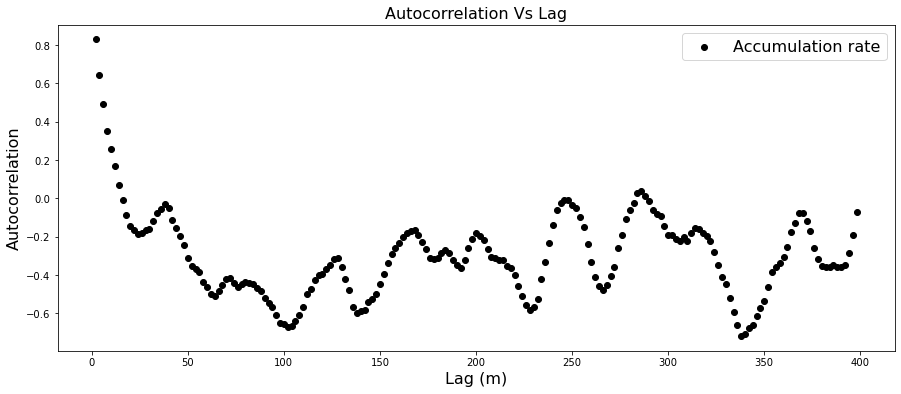

In [10]:
plot_autocorr(dist,acc, figsize = (15,6), label = 'Accumulation rate')
plt.legend(fontsize = 16)
plt.savefig('at.png')

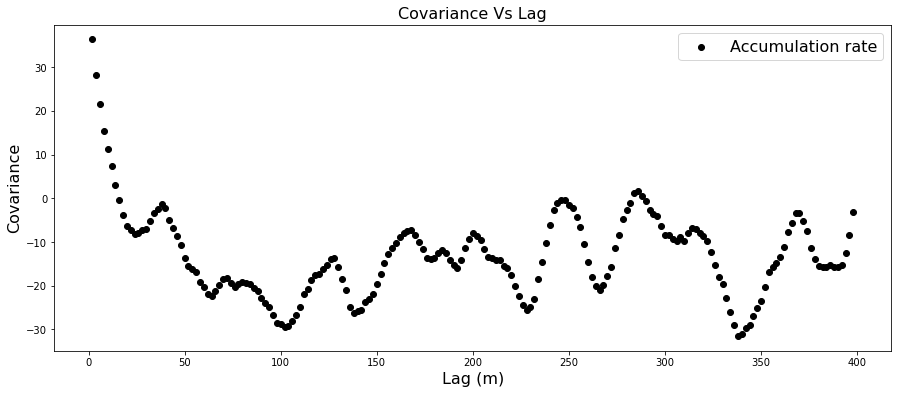

In [11]:
plot_covariance(dist,acc, figsize = (15,6), label = 'Accumulation rate')
plt.legend(fontsize = 16)
plt.savefig('cv.png')

From figures 5 and 6 above we notice that both covariance and correlation reduce with an increase in lag distance, this means that the measurement becomes less and less similar.

**Model Variogram**

From figure 5, we can select a value for the range and sill of the data, Let us consider the following code snippet, which produces figure 7, a plot of the experimental variogram model.


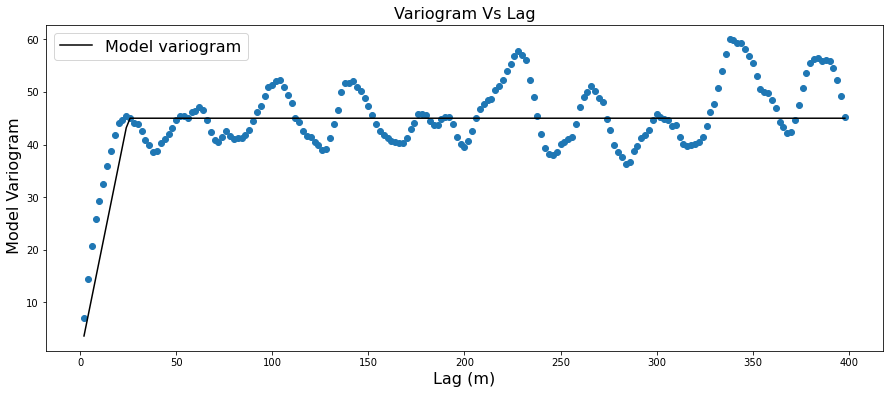

In [12]:
model_var = sv.variogramModel()
a = 25 #range from eye guage of the initial plot
c = 45 #sill from eye gauge of the initial plot
h = semi_var.h
model_var.solve(h,c,a,type_ = 'L')

plt.figure(figsize = (15,6))
plt.scatter(semi_var.h, semi_var.semi_var_)
plt.plot(semi_var.h, model_var.Vm, 'k', label = "Model variogram")
plt.ylabel(' Model Variogram', fontsize = 16)
plt.title('Variogram Vs Lag',fontsize = 16)
plt.xlabel('Lag (m)',fontsize = 16) # # labelx axis
plt.legend(fontsize = 16)
plt.savefig('semi_variogram.png')
plt.show;

By visual inspection, we can observe the black line which minimizes the variogram from our estimated values of 25 and 45 for range and sill respectively. However, this may not be the true optimal values for the range and sill that minimizes the error in the semivariogram. True optimal values of range and sill are obtained by modelling the semivariogram, this can be achieved by implementing a function to find optimal values of range and sill that minimizes the root mean square error(RMSE). The helper functions to perform this are in appendix; We will implement a brute force approache that uses those helper function to iterate over different values of range and sill. 


**Implementation Variogram Error**
**Brute Force**

In [13]:
a = np.arange(1,60) #range of possible range
c = np.arange(1,60) #range of possible sill

#Compute semvariance
V = semi_var.semi_var_

#compute lag
h = semi_var.h

type_ = 'L' #specify type

#brute force approach to compute rmse and return the location of the min rmse
n = len(a)
m = len(c)
rmse = np.ones((n,m)) * 1000

#Initilize minimum
res = sv.variogramModelError()
res.solve(h,V,c[0],a[0],type_)
min_rmse = res.rmse

#brute force to find min
for i in range(len(a)):
    for j in range(len(c)):
        res = sv.variogramModelError()
        res.solve(h,V,c[j],a[i],'L')
        rmse[i,j] = res.rmse
        
        #Update minimum to current minimum
        current_min = np.min(rmse)
        if min_rmse > current_min:
            min_rmse = current_min
            min_i = i # update range index
            min_j = j # update sill index
            
print ("Minimun RMSE = ", min_rmse, "found at sill: ", min_j , "and range: ", min_i )

Minimun RMSE =  5.401184423530747 found at sill:  45 and range:  16


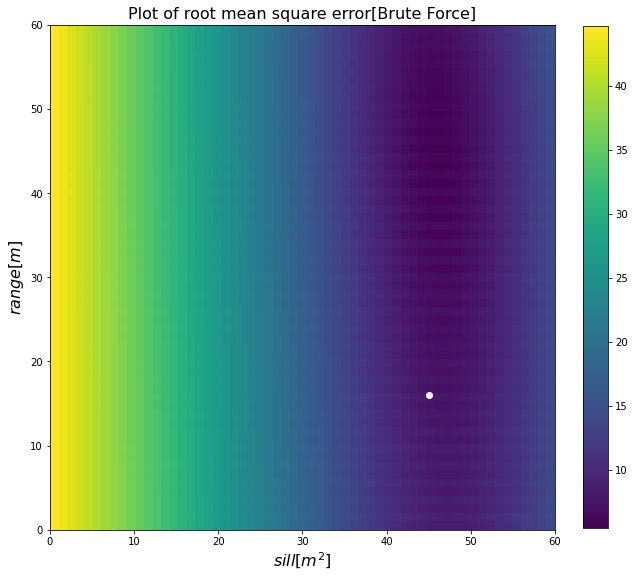

In [14]:
#plot the RMSE resolution 
plt.figure(figsize = (10,10))
c = plt.imshow(rmse,extent=[0, 60, 0, 60])
plt.colorbar(c, fraction  =0.045)
plt.plot(min_j, min_i, 'wo') #Indicate the minimum value
plt.xlabel(r'$sill[m^2]$', fontsize = 16)
plt.ylabel(r'$range[m]$', fontsize = 16)
plt.title('Plot of root mean square error[Brute Force]',fontsize = 16)
plt.savefig('rmse.png')
plt.show()

The color bar transits from dark to light with increasing order of magnitude of the RMSE. The plot above displays the magnitude of errors  at various range and sill in the modelled variogram. The white dot indicates the values of the sill and range where the minimum RMSE was found. The minimum RMSE was found to be 5.4011 at a  sill of 45 and range of 16. This brute force approach will not produce optimal values and may be slow for a large dataset. Alternatively, we can use the SciPy minimize function to find the optimal values for the range and sill.


**Using Scipy Optimize**

In [15]:
#Scipy function to find optimal sill and range
import scipy.optimize as optimize

#function hadle for optimization
def f(params):
    c, a = params 
    return model_variogram_error(h,V,c,a,'L') # function defined in appendix

initial_guess = [10, 10]

result = optimize.minimize(f, initial_guess)
if result.success:
    fitted_params = result.x
    print('RMSE = ',result.fun, 'Sill = ', fitted_params[0], 'Range = ', fitted_params[1])
else:
    raise ValueError(result.message)

NameError: name 'model_variogram_error' is not defined

In [ ]:
plt.figure(figsize = (10,10))
c = plt.imshow(rmse,extent=[0, 60, 0, 60],)
plt.colorbar(c, fraction  =0.045)
plt.plot(result.x[0], result.x[1], 'wo')
# plt.plot(fitted_params[0], fitted_params[1], 'wo')
plt.xlabel(r'$sill[m^2]$', fontsize = 16)
plt.ylabel(r'$range[m]$', fontsize = 16)
plt.title('Plot of root mean square error[Scipy optimize]',fontsize = 16)
plt.savefig('rmseS.png')
plt.show()

From Figure 9 above the white point indicates the optimal value of the range and sill found using SciPy optimize. The optimal values were found at $45.8883, 16.9598$ for the sill and range respectively. The color bar indicates the RMSE value in increasing order from dark blue to yellow. These optimal values had an RMSE of $5.40$. This result is close to the brute force approach and more precise.

#### **Interpretation of result**
The variogram modelled for the accumulation rate produced a sill and range of $45.8883, 16.9598$ respectively. The range represents the minimum lag distance where the variation in data is the same as the variance of the data, while the sill represents its corresponding variance.

**KRIGING** 

As mentioned earlier, kriging is an interpolation methods for estimating measurements in unsampled locations. Here we will use the rabbits ear dataset to implement kriging to interpolate snow depths. The data set contain coordinates of locations$(x,y)$ with their respective depths($d$) and elevation($z$). Additionally the data points here are along two transect and the spacing between data points are not equal. This choice of data, allows us to develop a more general methods for computing the experimental variogram and krigging. Let us take a peek into the data to visualize what it looks like.

In [ ]:
from scipy.io import loadmat
import scipy

#python krigging libraries
import pykrige as pk
import pykrige.kriging_tools as kt

#plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('RabbitEarsDepths.txt', sep="   ", header = None, engine ='python')
df.columns = ['X','Y','Z','D']
df.head()

In [ ]:
x = df['X']
y = df['Y']
z = df['Z']
D = df['D']

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(121)
sns.scatterplot(x = df['X'], y=df['Y'],hue =df['Z'])
plt.xlabel('x-coordinates', fontsize = 16)
plt.ylabel('y-coordinates', fontsize = 16)
plt.title('Plot of data location with elevations', fontsize = 16)


plt.subplot(122)
sns.scatterplot(x = df['X'], y=df['Y'],hue =df['D'])
plt.xlabel('x-coordinates', fontsize = 16)
plt.ylabel('y-coordinates', fontsize = 16)
plt.title('Plot of data location with Depths', fontsize = 16)
# plt.savefig('red')
# plt.show()
plt.savefig('ree')
plt.show()

The plots above show the elevation and snow depth of the measured locations. The color of points are darker for higher measurements and lighter for lower measurements in both cases. In the previous example, the data had only one transect, whereas, in this case the data represent two transects. In other to get a good diversity of lag distances, data was collected using an oblique angle transect. This method of data acquisition is useful in evaluating the variogram. 

First we compute the semi variogram. The following code implements variogram for data in two transects.

In [ ]:
# use semivariogram class for 2 transect to compute semivariogram
two_transect = sv.semivariogram2t()

#Implement thte solve function
two_transect.solve(x,y,D)

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(two_transect.hmod,two_transect.G, 'o')
plt.xlabel("lag distance", fontsize = 16 )
plt.ylabel("Depths", fontsize = 16)
plt.title("Experimental Variogram", fontsize = 16)
plt.savefig('rev.png')
plt.show()

Next we model the variogram to find the optimal value for the range and sill. We will implement two variation of the variogram model, a linear model and a spherical model. Again we  will use a helper function from the appendix. First, let us do the spherical case by specifying the type as S.

In [ ]:
range_ , sill_ = 450,50 # from the variogram above
h = two_transect.hmod
G = two_transect.G

model_variogram_error(two_transect.hmod,two_transect.G,range_ , sill_,'S')

In [ ]:
#Use Fmin optimize.minimize search to get best varigram parameters
import scipy.optimize as optimize

def f(params):
    c, a = params 
    return model_variogram_error(h,G,c,a,'S') # function defined in appendix

initial_guess = [500, 60]

result = optimize.minimize(f, initial_guess)
if result.success:
    fitted_params = result.x
    print('RMSE = ',result.fun, 'Sill = ', fitted_params[0], 'Range = ', fitted_params[1])
else:
    raise ValueError(result.message)

Here a minimum rmse of 94.7 was found at a range of 65.2860 and a sill of 431.52. Next, the linear case.

In [ ]:
#Use Fmin optimize.minimize search to get best varigram parameters
import scipy.optimize as optimize

def f(params):
    c, a = params 
    return model_variogram_error(h,G,c,a,'L') # function defined in appendix

initial_guess = [500, 60]

result = optimize.minimize(f, initial_guess)
if result.success:
    fitted_params = result.x
    print('RMSE = ',result.fun, 'Sill = ', fitted_params[0], 'Range = ', fitted_params[1])
else:
    raise ValueError(result.message)

In [ ]:
# fitted_params[0]

Here a minimum RMSE of 95.92 was found at a range of 47.359 and a sill of 429.098.

In [ ]:
re  = sv.variogramModel()
re.solve(h,fitted_params[0],fitted_params[1],'S')
Vmod = re.Vm

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(two_transect.hmod,Vmod,'r')
plt.plot(two_transect.hmod,two_transect.G, 'o')
plt.xlabel("Lag distance", fontsize = 16 )
plt.ylabel("Depths", fontsize = 16)
plt.title("Model Variogram for a Linear model", fontsize = 16)
plt.savefig('remv.png')

Next we interpolate for unsampled locations, The code snippet below shows the implementation for ordinary krigging in python. 

In [ ]:
#The grig where where i want to interpolate
gridx = np.arange(0.0,351.0,10)
gridy = np.arange(0.0,451.0,10)


#Compute kriging 
OK = pk.OrdinaryKriging(x,y,D, variogram_model='spherical')

#Intepolate at grid
estimates, variance = OK.execute("grid", gridx, gridy)

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(121)
kt.write_asc_grid(gridx, gridy, estimates, filename='output.asc')
cm = plt.imshow(estimates,extent=[0,350,0,450])
plt.title('Interpolation', fontsize =16)
plt.colorbar(cm)
plt.xlabel('x-coordinates', fontsize = 16)
plt.ylabel('y-coordinates', fontsize = 16)

plt.subplot(122)
kt.write_asc_grid(gridx, gridy, variance, filename='output.asc')
cm = plt.imshow(variance,extent=[0,350,0,450])
plt.title('Interpolation showing Uncertainties',fontsize =16)
plt.colorbar(cm)
plt.xlabel('x-coordinates', fontsize = 16)
plt.ylabel('y-coordinates', fontsize = 16)
plt.savefig('kriging.png')
plt.show()

#### **Interpretation of result**

The color bar moves from dark blue to yellow in increasing order of magnitude. The interpolation plot on the right shows the predicted values for the whole grid. Recall that we only had data for specific points on the grid. The second plot shows the uncertainties associated with those estimates. It can be seen that the uncertainty in estimates increases as the interpolated measurements drifts away from the observed measurements..

This document is accompanied with a jupyter notebook and a github repoitory for all the code.